# **EDA and preprocessing of Titanic dataset** 
## **-by AFZAL**  

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.style as style
style.use("seaborn-darkgrid")

# Importing data

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# About dataset:
    pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    The dataset defines family relations in this way...
    
    sibsp: 
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

    parch:
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.

# Data dictionary

In [3]:
data_dict=pd.read_csv('data_dict.csv', index_col='Variable')
data_dict

,Definition,Key
Variable,,
survival,Survival,"0 = No, 1 = Yes"
pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
sex,Sex,NaN
Age,Age in years,NaN
sibsp,# of siblings / spouses aboard the Titanic,NaN
parch,# of parents / children aboard the Titanic,NaN
ticket,Ticket number,NaN
fare,Passenger fare,NaN
cabin,Cabin number,NaN


# Basic info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# checking missing values
print('Missing values in each column:')
df.isna().sum()

Missing values in each column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

 + **seems like 'Cabin' and 'Age' have lots of missing values**
 + **'PassengerId' and 'Ticket' columns seem to be high variance variables and hence needs to be removed**

In [7]:
# removing 'Cabin', 'Ticket' and 'PassengerId' columns
df.drop(columns=['Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Imputing missing values

In [8]:
# 'Embarked' column seems to have some missing values hence imputed using mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [9]:
# impute missing age with median
df['Age'].fillna(df['Age'].median(), inplace = True)

### Checking any missing values

In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


# Feature Engineering

#### **family_size**

    The columns 'SibSp' and 'Parch' can be combined into single column named 'family_size'
    family size= 1(the person) + SibSp(siblings/spouses) + Parch(parents/children) 

In [12]:
df['family_size']= 1 + df.SibSp + df. Parch

#### **Title**
    
    A feature that represents child/woman/man is required
    It seems that in this incident a lot of women, children survived as compared to men.
    It can be observed that the title is followed by the name and comma and preceded by a dot. 
    We can use this pattern to extract the title.

In [13]:
df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [14]:
df.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

+ lets extract all the titles with ['Ms', 'Lady', 'Mlle'] as 'Miss'
+ titles with ['Mme', 'the Countess'] as 'Mrs'
+ titles with ['Sir'] as 'Mr'

In [15]:
df.Title = df.Title.apply(lambda x: 'Miss' if x.strip() in ['Ms', 'Lady', 'Mlle'] else x)

In [16]:
df.Title = df.Title.apply(lambda x: 'Mrs' if x.strip() in ['Mme', 'the Countess'] else x)

In [17]:
df.Title = df.Title.apply(lambda x: 'Mr' if x.strip() in ['Sir'] else x)

seems like most data is aggregated into the 4 classes('Mr', 'Master', 'Miss', 'Mrs')

In [18]:
df.Title.value_counts()

Mr          518
Miss        186
Mrs         127
Master       40
Dr            7
Rev           6
Major         2
Col           2
Don           1
Capt          1
Jonkheer      1
Name: Title, dtype: int64

##### setting the rest of the titles as 'Misc'

In [19]:
df.Title = df.Title.apply(lambda x: 'Misc' if x not in ['Mr', 'Miss', 'Mrs', 'Master'] else x)

Now 'Title' column captures a lot of the data that we wanted 

In [20]:
df.Title.value_counts()

Mr        518
Miss      186
Mrs       127
Master     40
Misc       20
Name: Title, dtype: int64

#### **Person**

    another feature that can be made instead of Title
    This feature says whether person was man/woman/child

In [21]:
def title_converter(df):
    
    alist=np.array([])
    
    for i,row in df.iterrows():
        
        # classify all people below 16 yrs of age as children
        if row.Age<16:
            alist=np.append(alist, 'Child')
            
        if row.Age>=16:
            if row.Sex=='male':
                alist=np.append(alist, 'Man')
            else:
                alist=np.append(alist, 'Woman')

    return alist

df['Person']=title_converter(df)

df['Person'].value_counts()

Man      537
Woman    271
Child     83
Name: Person, dtype: int64

    Dropping other redundant features that have already been transformed

In [22]:
df.drop(columns=['Name', 'Sex', 'SibSp', 'Parch'], axis=1, inplace=True)

In [23]:
df.head()

,Survived,Pclass,Age,Fare,Embarked,family_size,Title,Person
0,0,3,22.0,7.2500,S,2,Mr,Man
1,1,1,38.0,71.2833,C,2,Mrs,Woman
2,1,3,26.0,7.9250,S,1,Miss,Woman
3,1,1,35.0,53.1000,S,2,Mrs,Woman
4,0,3,35.0,8.0500,S,1,Mr,Man


# Encoding categorical features

### encoding 'Pclass'
    assuming higher class people had a little more influence, lets give them a little more weightage while encoding
    0: Lower class
    1: Middle class
    2: Upper class

In [24]:
df['Pclass_enc']= -df.Pclass + 3

### encoding 'Person'

In [25]:
df_sex_age_title_combined_enc=pd.get_dummies(df.Person).drop('Man',axis=1)
df_sex_age_title_combined_enc.index=df.index
df=pd.concat([df, df_sex_age_title_combined_enc], axis=1 )

### encoding 'Embarked'

In [26]:
df_embarked_enc=pd.get_dummies(df.Embarked).drop('S',axis=1)
df_embarked_enc.index=df.index
df=pd.concat([df, df_embarked_enc], axis=1 )
df.head()

,Survived,Pclass,Age,Fare,Embarked,family_size,Title,Person,Pclass_enc,Child,Woman,C,Q
0,0,3,22.0,7.2500,S,2,Mr,Man,0,0,0,0,0
1,1,1,38.0,71.2833,C,2,Mrs,Woman,2,0,1,1,0
2,1,3,26.0,7.9250,S,1,Miss,Woman,0,0,1,0,0
3,1,1,35.0,53.1000,S,2,Mrs,Woman,2,0,1,0,0
4,0,3,35.0,8.0500,S,1,Mr,Man,0,0,0,0,0


### **Now our data is clean and ready to be analysed**

# Univariate analysis

### Lets see the survival rate 

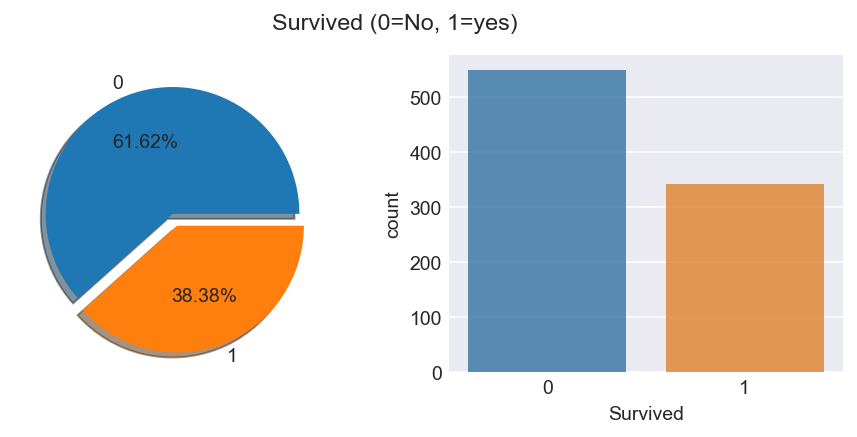

In [27]:
fig,ax=plt.subplots(1,2, figsize=(8,3), dpi=140)

df.Survived.value_counts().plot.pie(explode=[0,0.1], ax=ax[0], autopct='%1.2f%%', shadow=True)
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=df, alpha=0.8, ax=ax[1])

plt.suptitle('Survived (0=No, 1=yes)')
plt.show()

    seems not many survived

In [28]:
#####################################
'''IMPORTING FROM MY CUSTOM MODULE'''
#####################################
from quick_EDA import analysis_quant, analysis_cate, handle_outliers, correlation

### Quantative features

				ANALYSIS OF: Age 

5 point summary for: Age
       Age
min   0.42
25%  22.00
50%  28.00
75%  35.00
max  80.00
---------------------------------
OUTLIERS in Age via Z score

Outlier limits:
lower limit: -9.675582326798512 
upper limit: 68.39874730996348

Total outliers: 7
     outliers   Z-score
672      70.0  3.123056
745      70.0  3.123056
116      70.5  3.161481
96       71.0  3.199906
493      71.0  3.199906
851      74.0  3.430455
630      80.0  3.891554
---------------------------------
OUTLIERS in Age via IQR

Outlier limits:
lower limit: 2.5 
upper limit: 54.5

Total outliers: 66
      Age
803  0.42
755  0.67
469  0.75
644  0.75
831  0.83 
.
.
      Age
116  70.5
96   71.0
493  71.0
851  74.0
630  80.0
---------------------------------


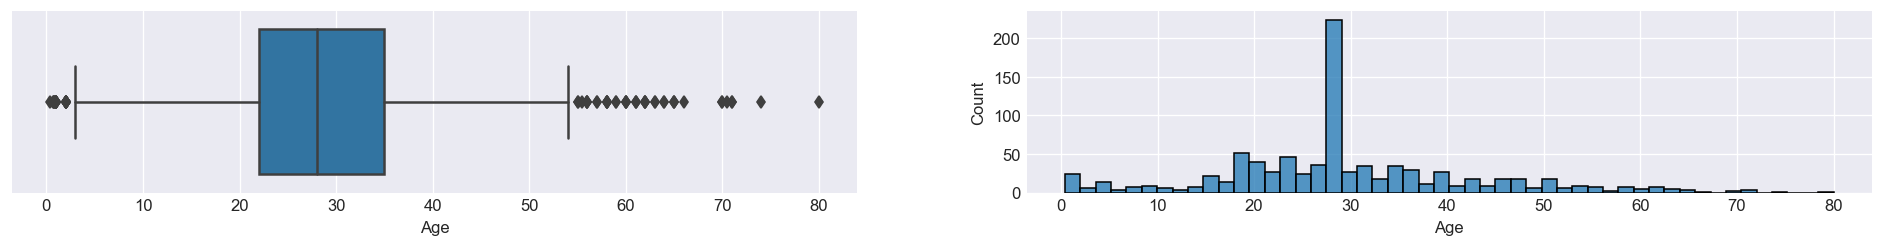

___________________________________________________________________________________________________________
				ANALYSIS OF: Fare 

5 point summary for: Fare
         Fare
min    0.0000
25%    7.9104
50%   14.4542
75%   31.0000
max  512.3292
---------------------------------
OUTLIERS in Fare via Z score

Outlier limits:
lower limit: -116.79239536574768 
upper limit: 181.20081130289697

Total outliers: 20
     outliers   Z-score
779  211.3375  3.606793
730  211.3375  3.606793
689  211.3375  3.606793
377  211.5000  3.610065
527  221.7792  3.817033 
.
.
     outliers   Z-score
88   263.0000  4.647001
438  263.0000  4.647001
258  512.3292  9.667167
737  512.3292  9.667167
679  512.3292  9.667167
---------------------------------
OUTLIERS in Fare via IQR

Outlier limits:
lower limit: -26.724 
upper limit: 65.6344

Total outliers: 116
      Fare
336  66.60
151  66.60
369  69.30
641  69.30
846  69.55 
.
.
         Fare
27   263.0000
341  263.0000
679  512.3292
737  512.3292
258  512.3292
----

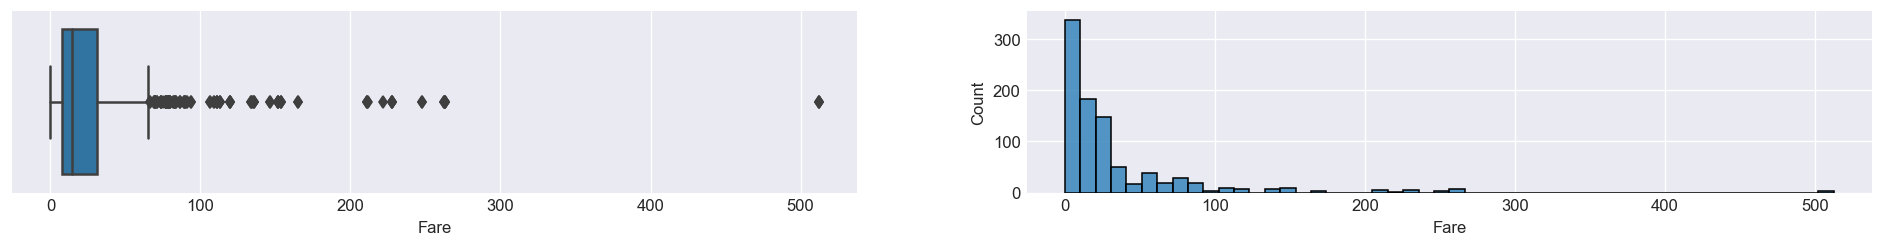

___________________________________________________________________________________________________________


In [29]:
columns_quant=['Age','Fare']
analysis_quant(df, columns_quant, figsize=(20,2), dpi=120)

    seems like 'Fare' has a few outliers that can be compressed

Compressed the following outliers in Fare:

Total outliers: 20
     outliers   Z-score
779  211.3375  3.606793
730  211.3375  3.606793
689  211.3375  3.606793
377  211.5000  3.610065
527  221.7792  3.817033 
.
.
     outliers   Z-score
88   263.0000  4.647001
438  263.0000  4.647001
258  512.3292  9.667167
737  512.3292  9.667167
679  512.3292  9.667167


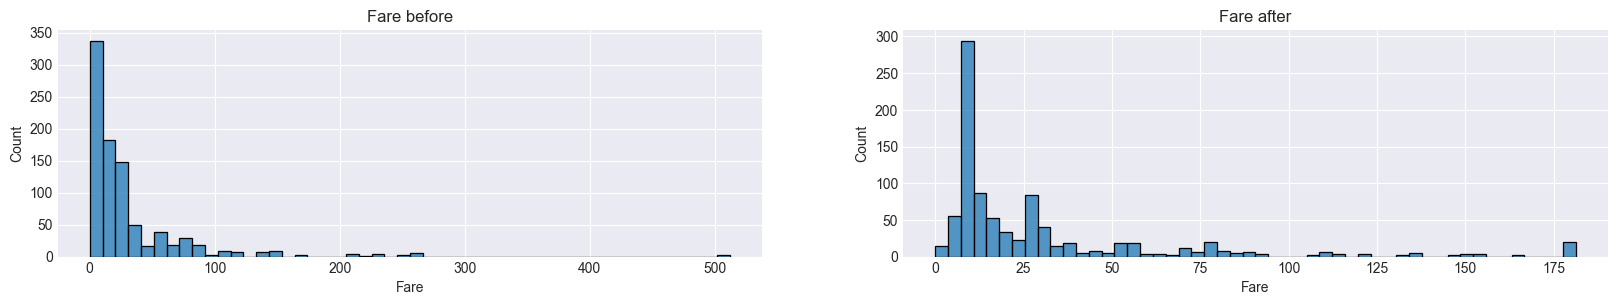

_____________________________________________________________________________________________________________________


In [30]:
handle_outliers(df, 'Fare')

### Categorical features

				ANALYSIS OF: Pclass 

No. of UNIQUE values:
3    491
1    216
2    184
Name: Pclass, dtype: int64



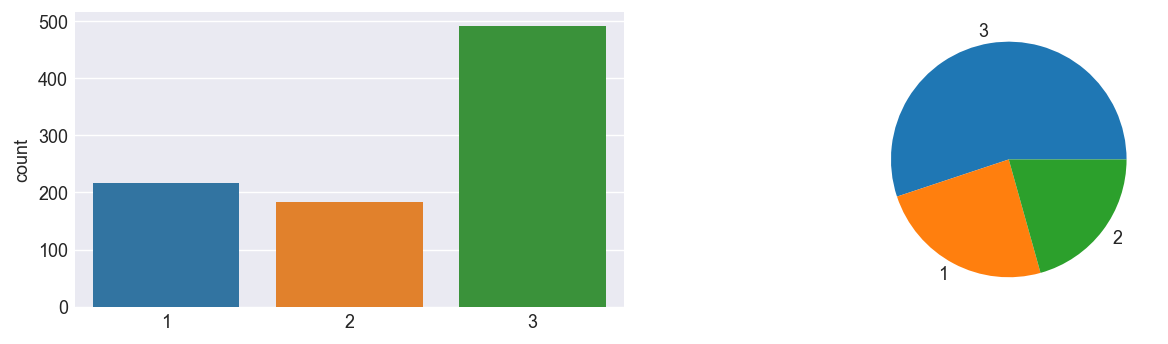

_____________________________________________________________________________________________________________________
				ANALYSIS OF: Embarked 

No. of UNIQUE values:
S    646
C    168
Q     77
Name: Embarked, dtype: int64



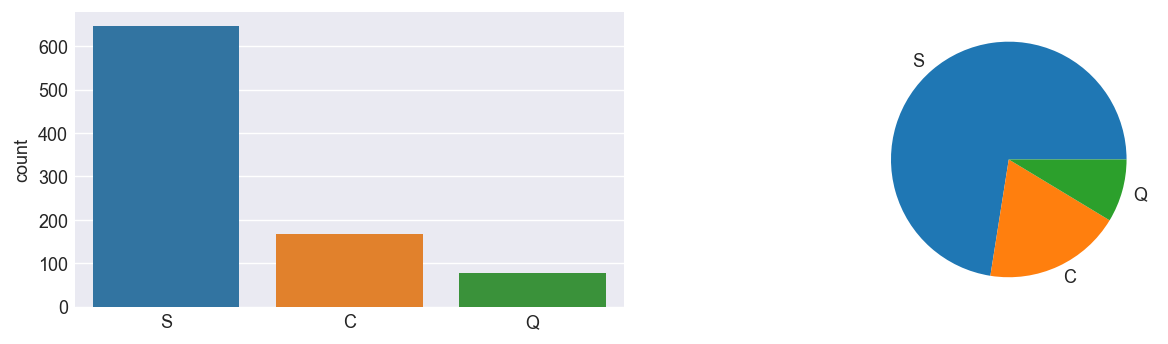

_____________________________________________________________________________________________________________________
				ANALYSIS OF: family_size 

No. of UNIQUE values:
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_size, dtype: int64



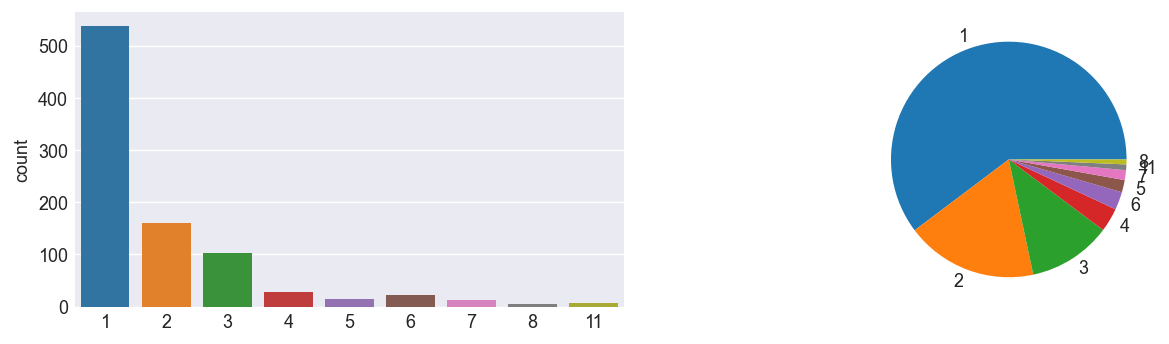

_____________________________________________________________________________________________________________________
				ANALYSIS OF: Person 

No. of UNIQUE values:
Man      537
Woman    271
Child     83
Name: Person, dtype: int64



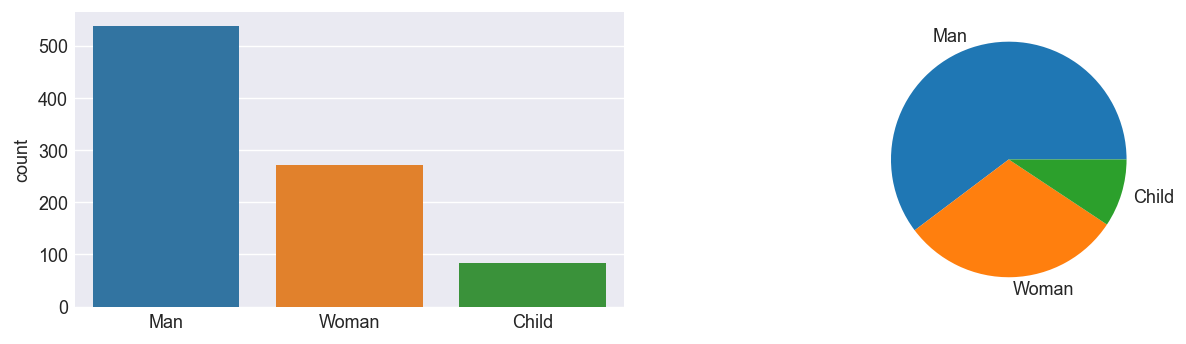

_____________________________________________________________________________________________________________________
				ANALYSIS OF: Title 

No. of UNIQUE values:
Mr        518
Miss      186
Mrs       127
Master     40
Misc       20
Name: Title, dtype: int64



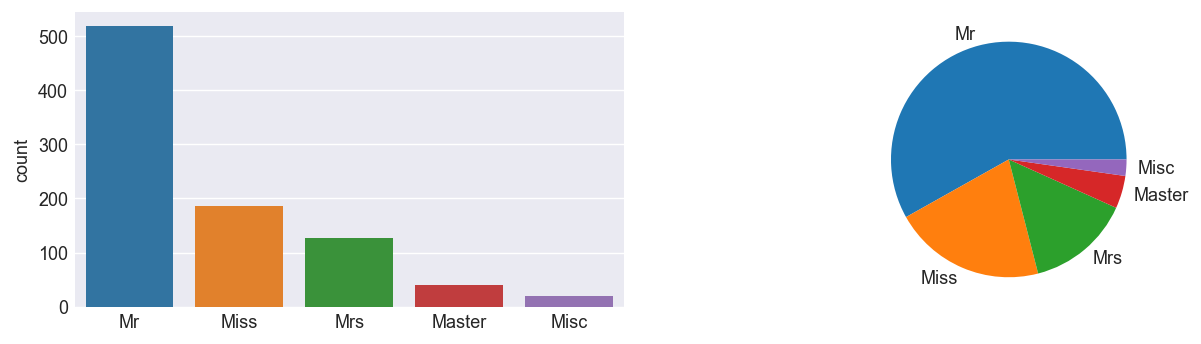

_____________________________________________________________________________________________________________________


In [31]:
columns_cate=['Pclass','Embarked','family_size','Person','Title']
analysis_cate(df, columns_cate, figsize=(12,3), dpi=130)

+ There are a lot of lower class people
+ A lot of people embarked from Southampton
+ Very high number of lone travellers
+ Proportion of men is higher than women and children combined

# Bivariate analysis

### Correlation

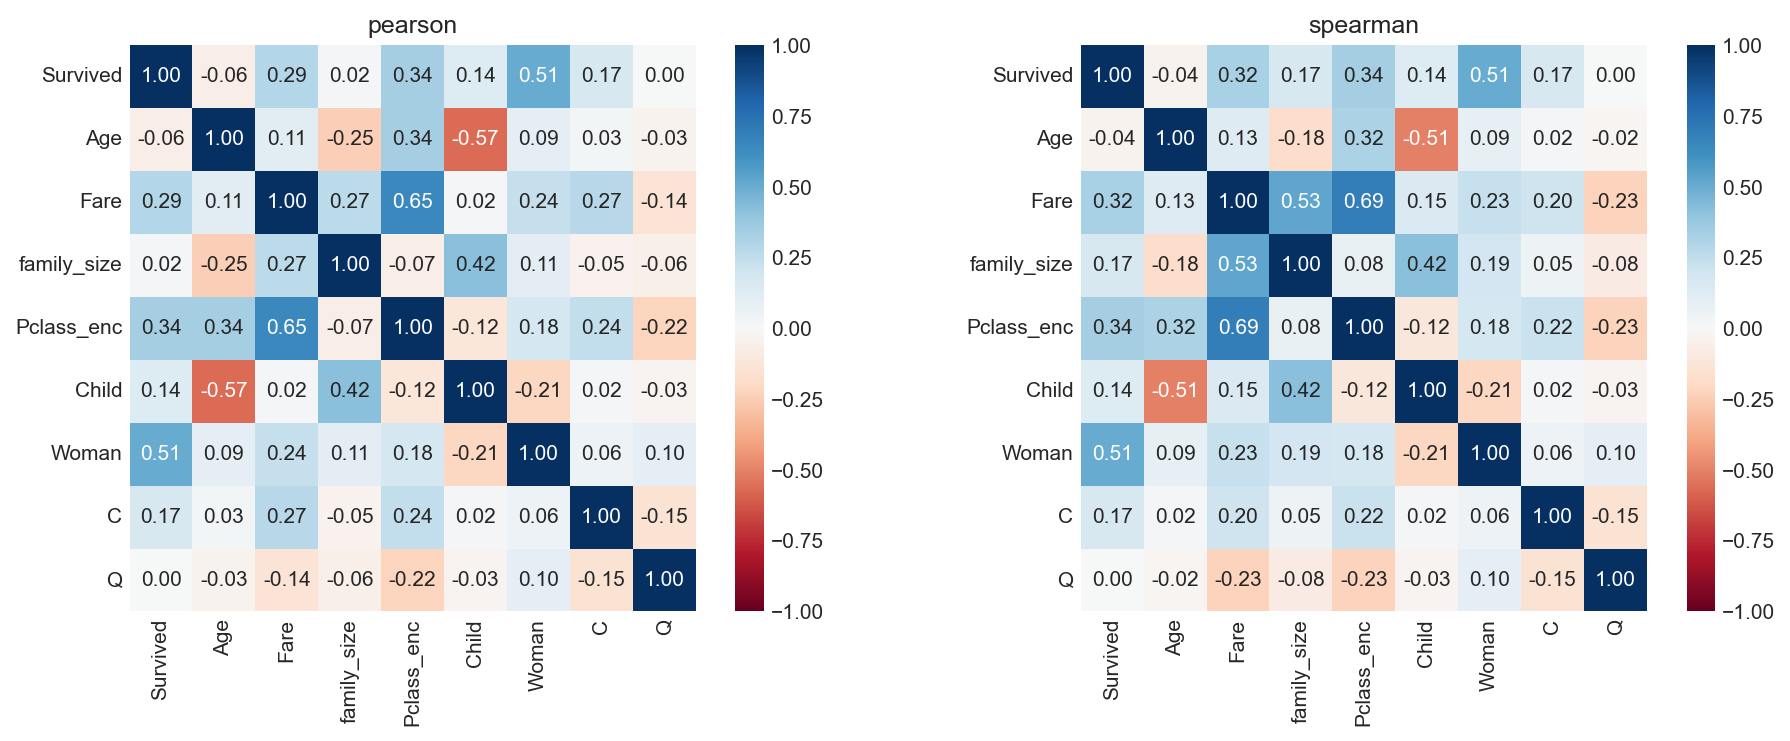

In [32]:
correlation(df.drop(columns='Pclass',axis=1), figsize=(15,5), dpi=150)

+ Fare and Pclass_enc are moderately correlated
+ Mild correlation between Age and Child
+ Mild correlation between Woman and survived 

### Effect of Age on survival

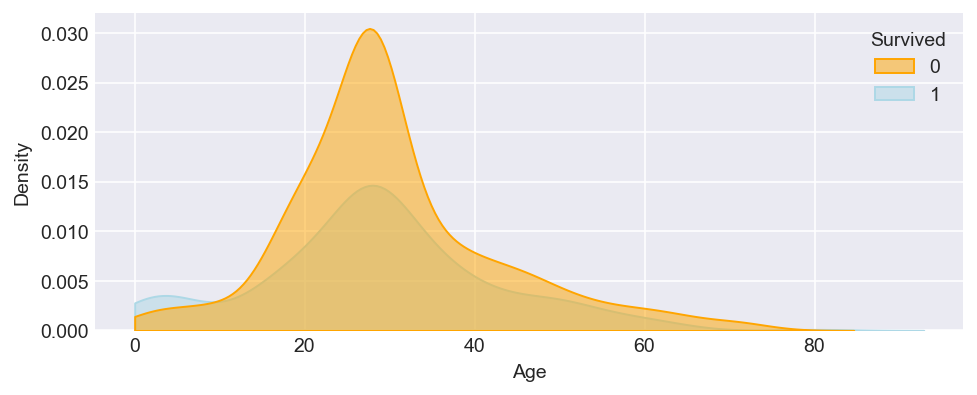

In [33]:
plt.figure(figsize=(8,3), dpi=140)

sns.kdeplot(
    data=df,
    x='Age',
    hue='Survived',
    fill=True,
    clip=(0,100), alpha=0.5, palette={0:'orange', 1:'lightblue'}
)
plt.show()

#### **seems like children survived more than adults on an average**

### Effect of Fare on survival

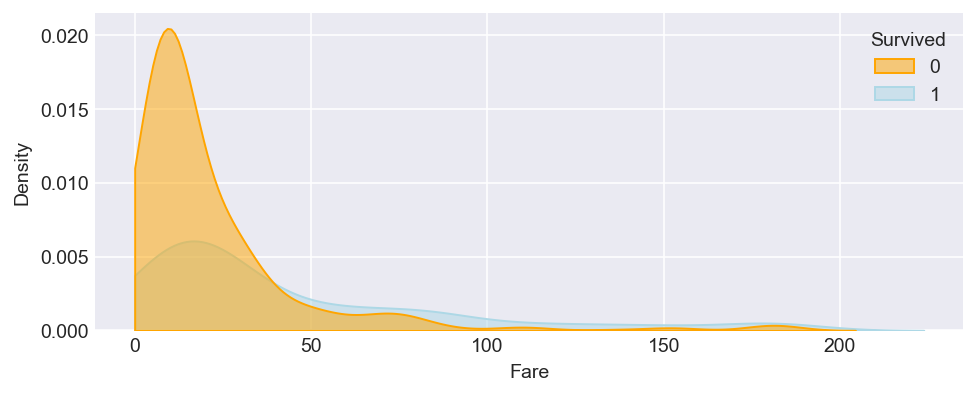

In [34]:
plt.figure(figsize=(8,3), dpi=140)

sns.kdeplot(
    data=df,
    x='Fare',
    hue='Survived',
    fill=True,
    clip=(0,280), alpha=0.5, palette={0:'orange', 1:'lightblue'}
)
plt.show()

#### **looks like people with higher fares survived more**

### Effect of Pclass on survival

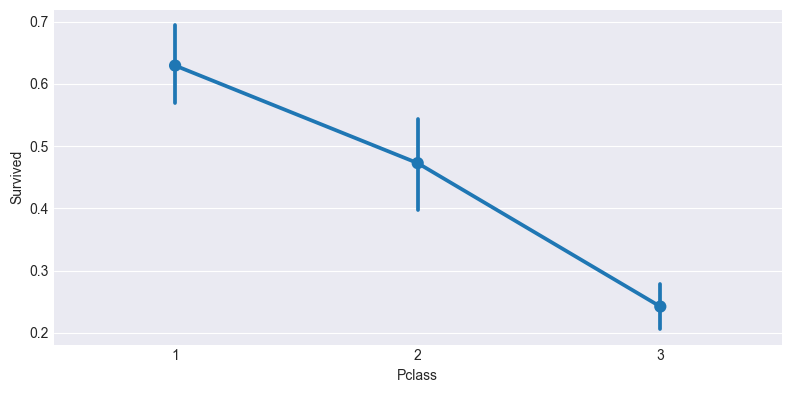

In [35]:
plot=sns.catplot(
    data=df,
    x='Pclass',
    y='Survived',
    kind='point',
    aspect=2, height=4
)
plot.fig.dpi=100

#### **looks like upper class people survived more**

### Effect of family_size on survival

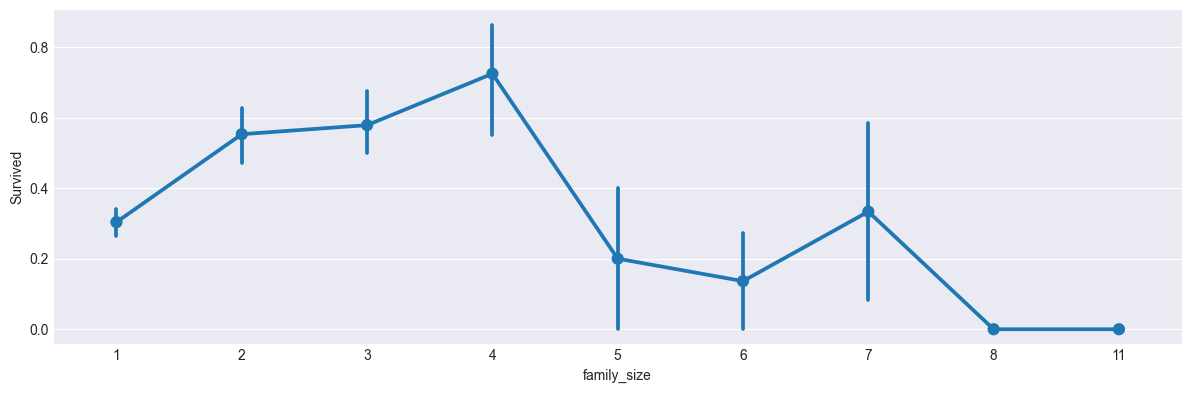

In [36]:
plot=sns.catplot(
    data=df,
    x='family_size',
    y='Survived',
    kind='point',
    aspect=3, height=4
)
plot.fig.dpi=100

#### **looks like people with family size of 4 survived more**

### Effect of Person on survival

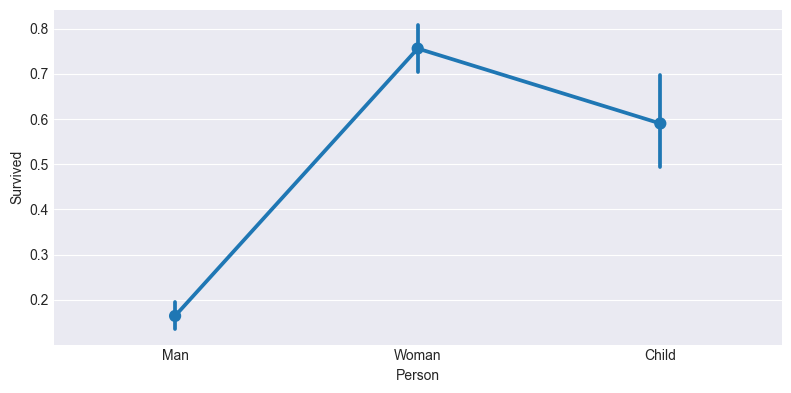

In [37]:
plot=sns.catplot(
    data=df,
    x='Person',
    y='Survived',
    kind='point',
    aspect=2, height=4
)
plot.fig.dpi=100

#### **looks like women and children survived more**

### Effect of Embarked on survival

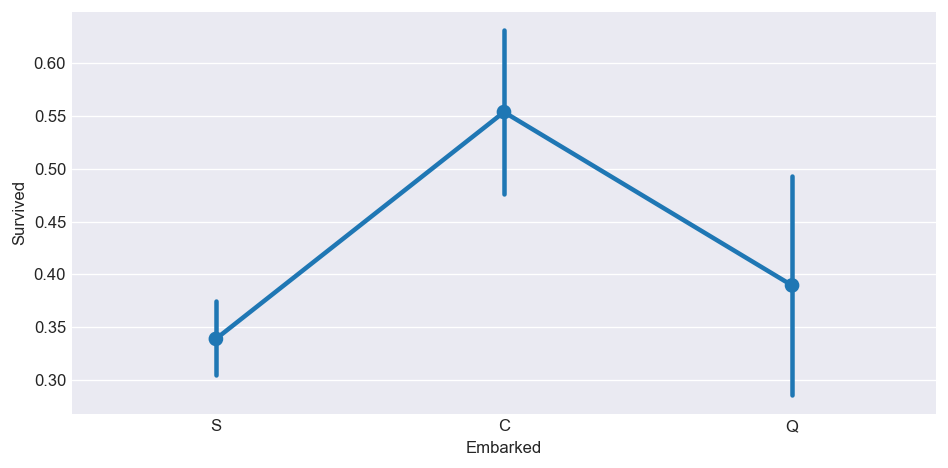

In [38]:
plot=sns.catplot(
    data=df,
    x='Embarked',
    y='Survived',
    kind='point',
    aspect=2, height=4
)
plot.fig.dpi=120

#### **Seems like people mostly from Cherbourg survived more**

### Embarked vs Pclass

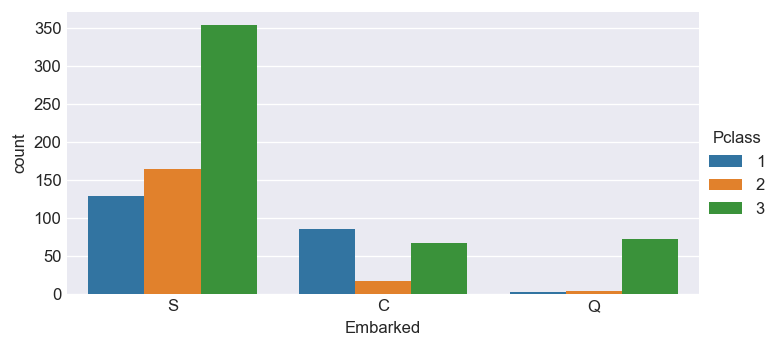

In [39]:
plot=sns.catplot(
    data=df,
    x='Embarked',
    hue='Pclass',
    kind='count',
    aspect=2, height=3
)
plot.fig.dpi=120

    seems like people who boarded from queenstown were mostly lower class

# Multivariate analysis

### Lets try to get an overall picture
### 'Fare' vs 'Age' for various categorical features

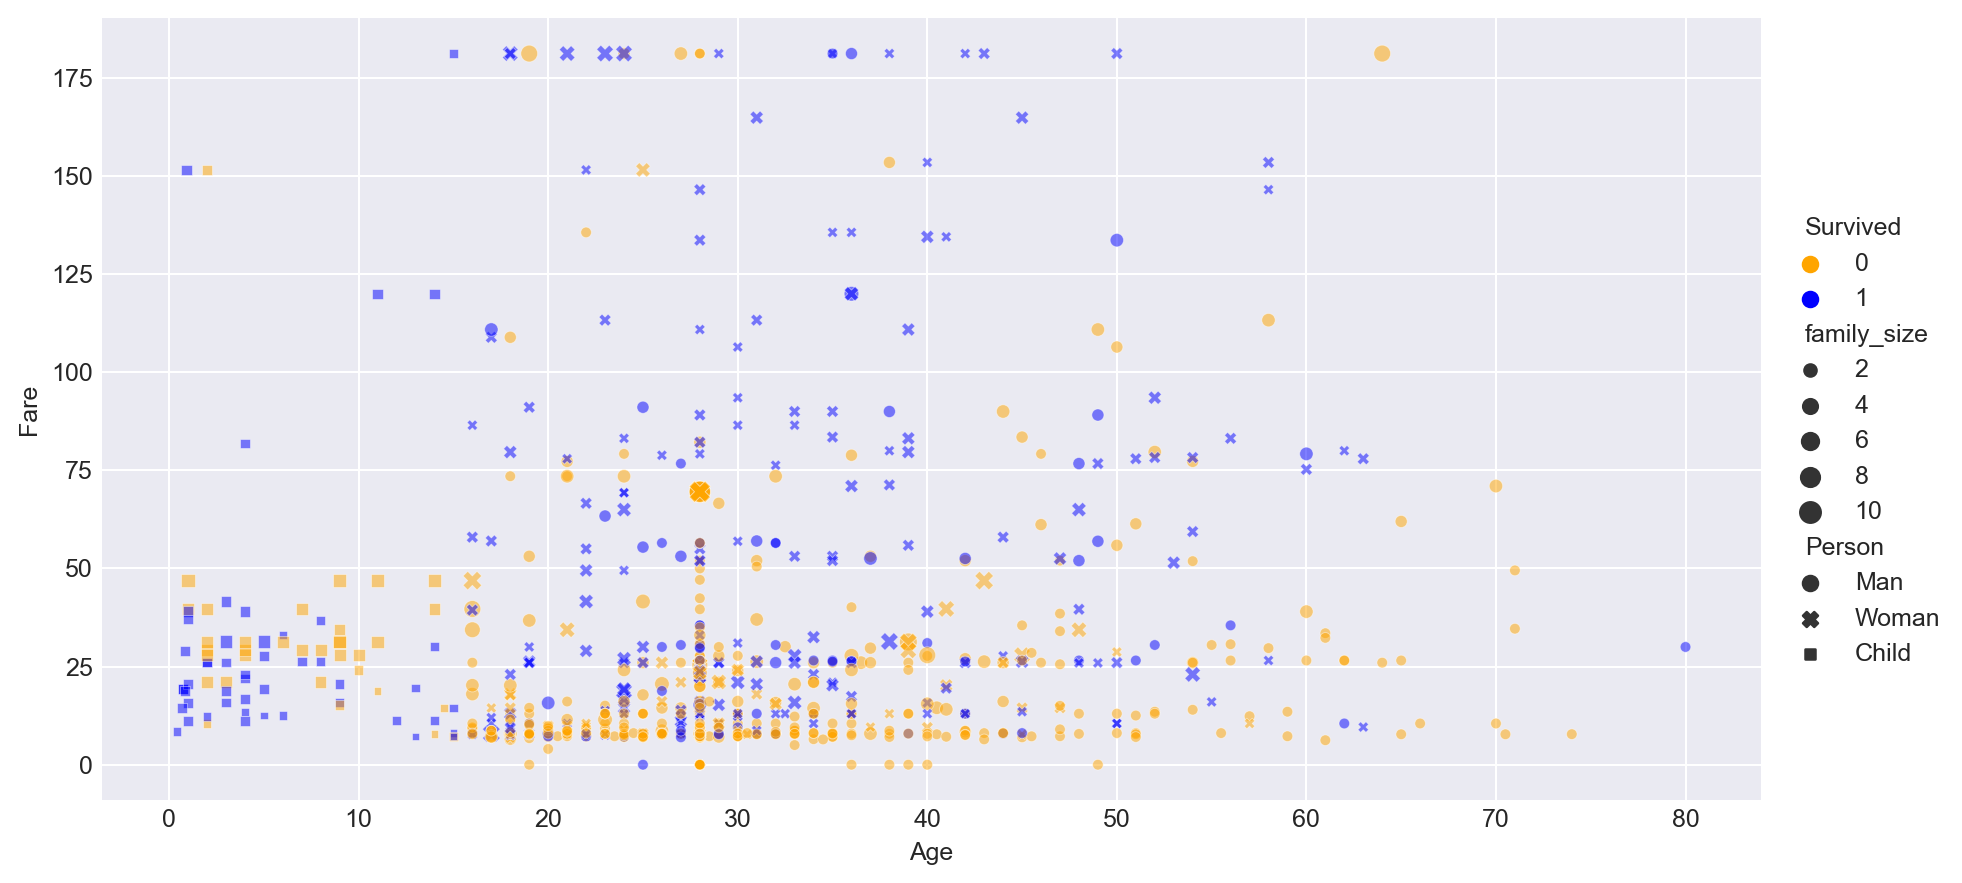

In [40]:
plot=sns.relplot(
    data=df,
    x='Age',
    y='Fare',
    hue='Survived',
    size='family_size',
    style='Person',
    aspect=2, height=5, alpha=0.5, palette={0:'orange', 1:'blue'}
)
plot.fig.dpi=180

    Seems like people with higher fare, less age(0 to 7) tend to survive more on an average but further analysis is needed

## **Lets Explore for each type of person**

### Effect of 'family_size' on 'Survived'

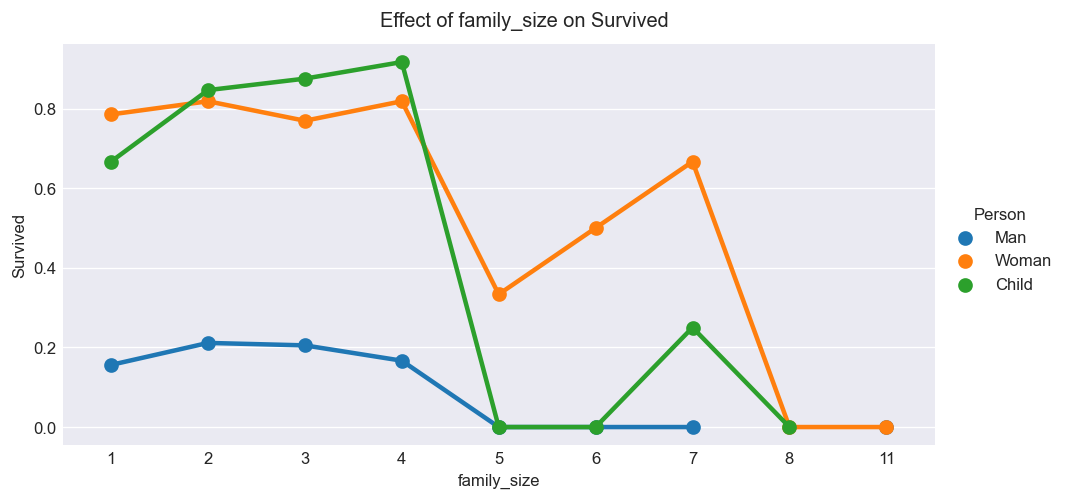

In [41]:
plot=sns.catplot(
    data=df,
    x='family_size',
    y='Survived',
    hue='Person',
    kind='point',
    aspect=2, height=4, ci=False
)

plot.fig.dpi=120
plot.fig.suptitle('Effect of family_size on Survived', y=1.03)
plt.show()

    Seems like family size of four have high survival rate in case of women and children 

### Effect of 'Pclass' on 'Survived'

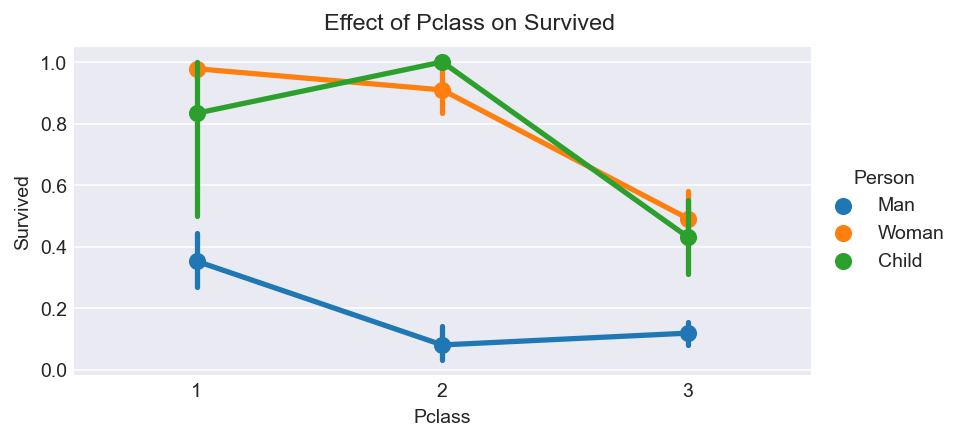

In [42]:
plot=sns.catplot(
    data=df,
    x='Pclass',
    y='Survived',
    hue='Person',
    kind='point',
    aspect=2, height=3
)

plot.fig.dpi=140
plot.fig.suptitle('Effect of Pclass on Survived', y=1.03)
plt.show()

#### **Looks like people from higher class survived more in most of the cases**

### Effect of 'Embarked' on 'Survived'

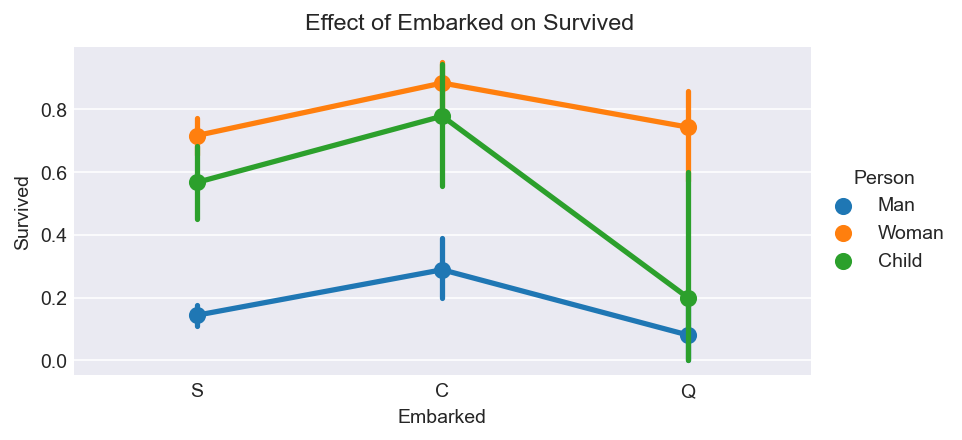

In [43]:
plot=sns.catplot(
    data=df,
    x='Embarked',
    y='Survived',
    hue='Person',
    kind='point',
    aspect=2, height=3
)

plot.fig.dpi=140
plot.fig.suptitle('Effect of Embarked on Survived', y=1.03)
plt.show()

#### **Seems like people mostly from Cherbourg survived more**

### Lets see the effect of 'Age' and 'Person' on 'Survival'

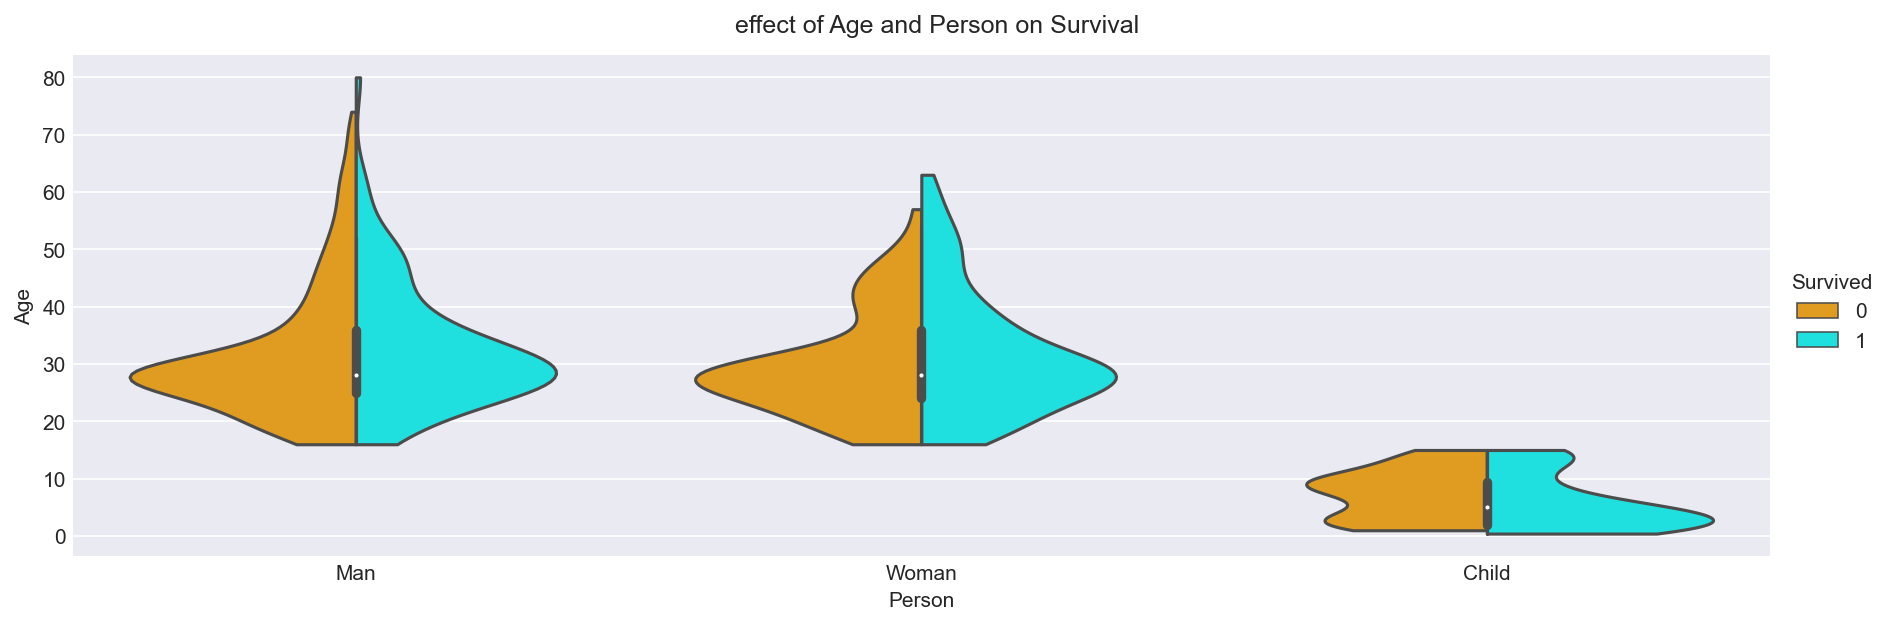

In [44]:
plot=sns.catplot(
    data=df,
    x='Person',
    y='Age',
    hue='Survived',
    kind='violin', 
    split=True, cut=0, palette={0: "orange", 1: "cyan"}, aspect=3, height=4
)

plot.fig.dpi=150
plot.fig.suptitle('effect of Age and Person on Survival', y=1.03)
plt.show() 

    seems like children below age of 10 survived more

### Lets see the effect of 'Fare' and 'Person' on 'Survival'

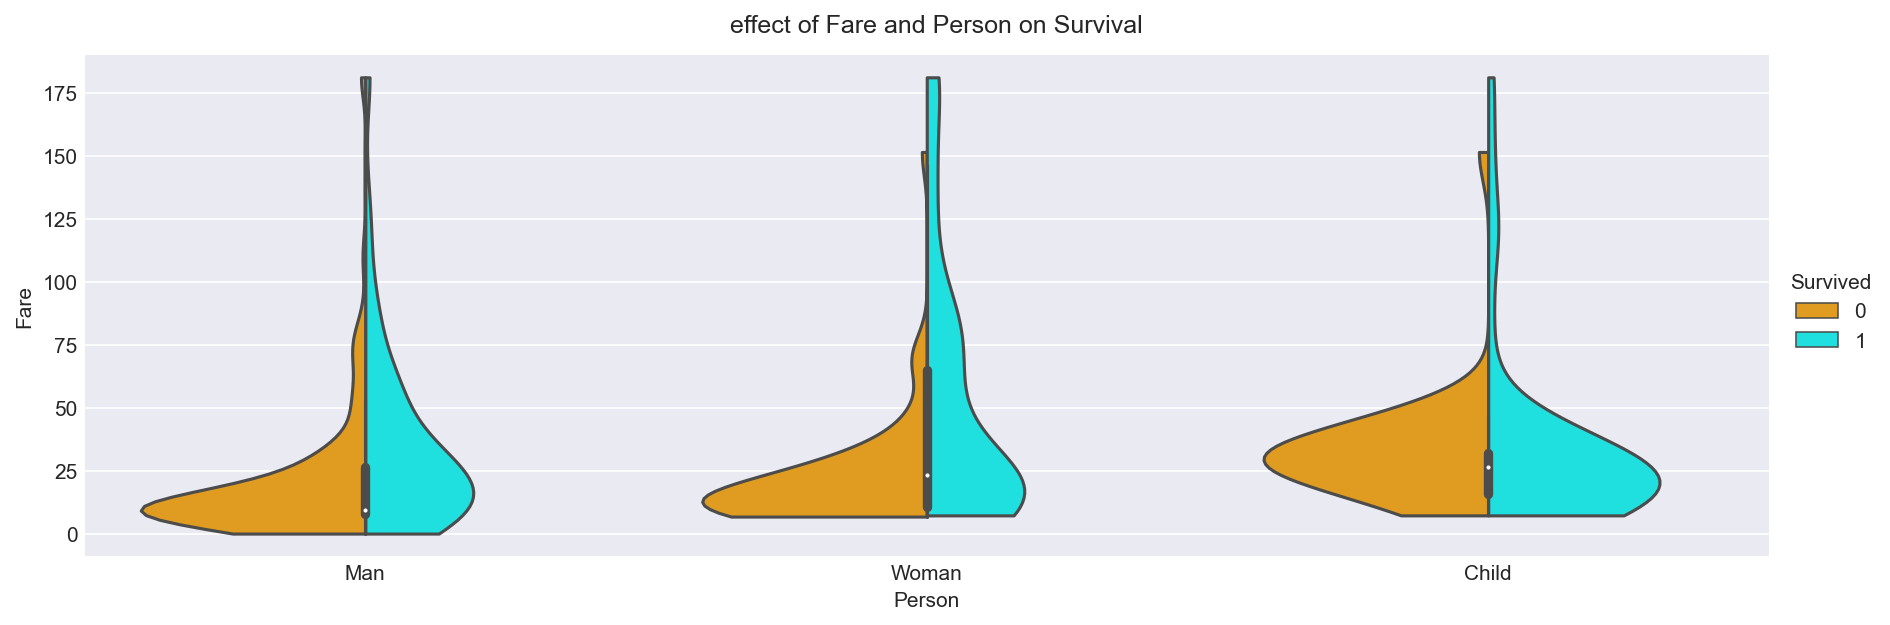

In [45]:
plot=sns.catplot(
    data=df,
    x='Person',
    y='Fare',
    hue='Survived',
    kind='violin', 
    split=True, cut=0, palette={0: "orange", 1: "cyan"}, aspect=3, height=4
)

plot.fig.dpi=150
plot.fig.suptitle('effect of Fare and Person on Survival', y=1.03)
plt.show() 

#### **clearly looks like people with higher fare survived more in case of children and women**
(take a closer look at the upper part of the plot corresponding to woman and child)